In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from xgboost import XGBClassifier

import shap

In [2]:
df = pd.read_csv('dataset/train.csv')

In [3]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,178478,Bachelors,13,Never-married,Tech-support,Own-child,White,Female,0,0,40,United-States,<=50K
1,23,State-gov,61743,5th-6th,3,Never-married,Transport-moving,Not-in-family,White,Male,0,0,35,United-States,<=50K
2,46,Private,376789,HS-grad,9,Never-married,Other-service,Not-in-family,White,Male,0,0,15,United-States,<=50K
3,55,?,200235,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,50,United-States,>50K
4,36,Private,224541,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,El-Salvador,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39068,54,Private,83103,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,67,United-States,<=50K
39069,23,Private,172232,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,53,United-States,<=50K
39070,37,Local-gov,165883,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
39071,26,Self-emp-not-inc,67240,HS-grad,9,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,35,United-States,<=50K


In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

df_encoded = df.copy()

for column in df.select_dtypes('object'):
    df_encoded[column] = LabelEncoder().fit_transform(df_encoded[column])

y = df_encoded['class']
y = y.astype('category').cat.codes
X = df_encoded.drop('class', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
def evaluate(y_real, y_pred):
    if isinstance(list(y_pred)[0], (int, np.int32, np.int64)):
        from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
        
        acc = accuracy_score(y_real, y_pred)
        prc = precision_score(y_real, y_pred)
        rec = recall_score(y_real, y_pred)
        f1 = f1_score(y_real, y_pred)
        
        return pd.Series([acc, prc, rec, f1], index=['Accuracy', 'Precision', 'Recall', 'F1'])
    
    else:
        from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
        from scipy.stats import pearsonr
        
        mae = mean_absolute_error(y_real, y_pred)
        rmse = np.sqrt(mean_squared_error(y_real, y_pred))
        r2 = r2_score(y_real, y_pred)
        corr, _ = pearsonr(y_real, y_pred)
        
        return pd.Series([mae, rmse, r2, corr], index=['MAE', 'RMSE', 'R2', 'PearsonR'])

In [7]:
model = XGBClassifier().fit(X_train, y_train)
pred = model.predict(X_test)

evaluate(y_test, pred)

Accuracy     0.871273
Precision    0.754777
Recall       0.656146
F1           0.702014
dtype: float64

In [8]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)

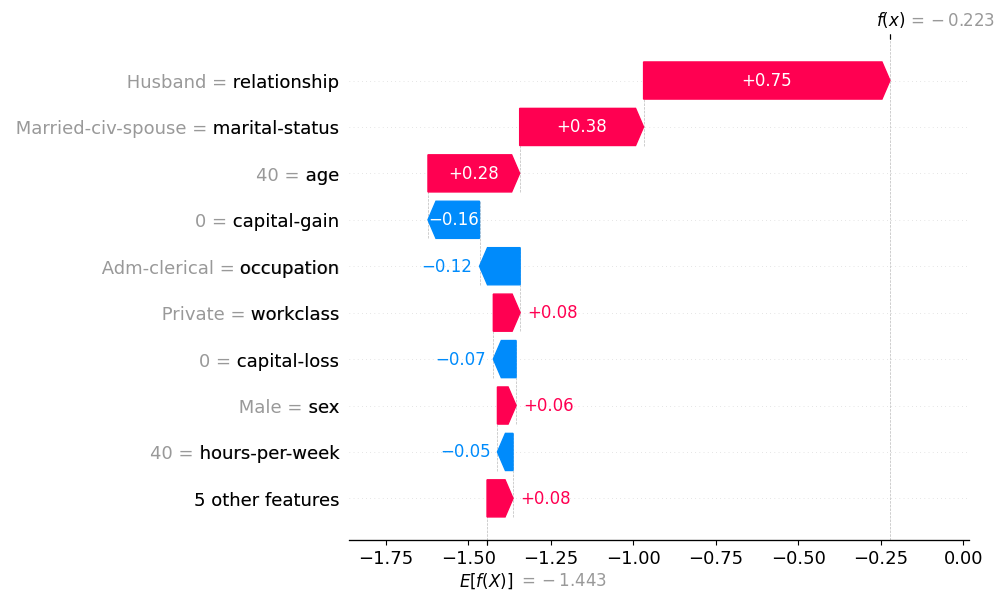

In [9]:
idx = 17
want_to_show = shap_values[idx]
want_to_show.data = df.drop(columns='class').loc[X_test.iloc[idx].name].to_numpy()
shap.plots.waterfall(want_to_show)

In [10]:
shap.initjs()

shap.plots.force(want_to_show)

In [11]:
shap.initjs()

shap.plots.force(want_to_show, link='logit')

In [12]:
explainer = shap.TreeExplainer(model, data=X_test, model_output='probability')
shap_values = explainer(X_test)

 98%|===================| 7679/7815 [00:17<00:00]        

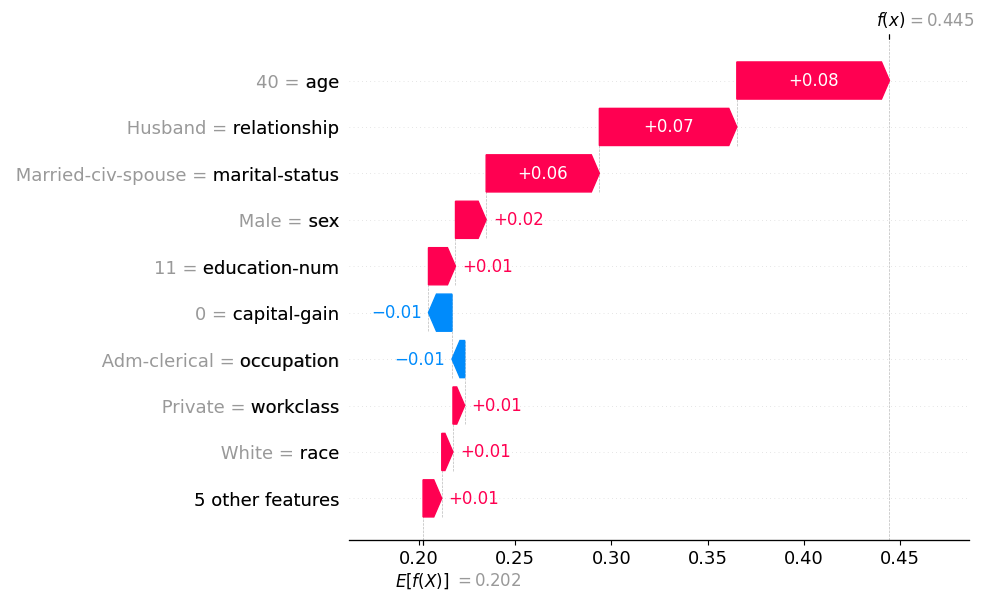

In [13]:
idx = 17
want_to_show = shap_values[idx]
want_to_show.data = df.drop(columns='class').loc[X_test.iloc[idx].name].to_numpy()
shap.plots.waterfall(want_to_show)

In [14]:
shap.initjs()

shap.plots.force(want_to_show)